In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

In [91]:
data = load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [8]:
x = data.data
y = data.target

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train,Y_train)

LinearRegression()

In [12]:
pred = lr.predict(X_test)

In [14]:
from sklearn.metrics import r2_score,mean_squared_error

In [17]:
print("r2_score: ",r2_score(Y_test,pred))
print("mean_squared_erro: ",np.sqrt(mean_squared_error(pred,Y_test)))

r2_score:  0.43843162133692803
mean_squared_erro:  54.70449002870803


In [18]:
from sklearn.linear_model import Ridge

In [67]:
R = Ridge(alpha = 0.001)

In [68]:
R.fit(X_train,Y_train)

Ridge(alpha=0.001)

In [69]:
pred2 = R.predict(X_test)

In [70]:
print("r2_score: ",r2_score(Y_test,pred2))
print("mean_squared_erro: ",np.sqrt(mean_squared_error(pred2,Y_test)))

r2_score:  0.43733738935456146
mean_squared_erro:  54.75776072002402


In [71]:
x1 = 5 * np.random.rand(100,1) - 2
x2 = 0.7 * x1**2 - 2 * x1 + 3 + np.random.randn(100,1)

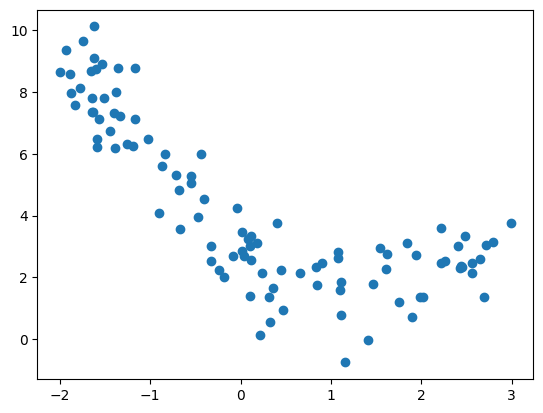

In [73]:
plt.scatter(x1,x2)

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

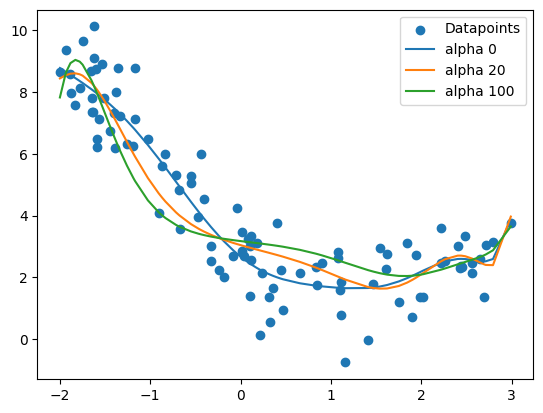

In [102]:
def get_preds_redge(x1,x2,alpha):
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=10)),
        ("redge", Ridge(alpha=alpha))
        ])
    model.fit(x1,x2)
    return model.predict(x1)

alpha = [0,20,100]

plt.scatter(x1,x2,label="Datapoints")
for a in alpha:
    pred = get_preds_redge(x1,x2,a)
    sns.lineplot(x=x1.ravel(),y=pred, weights =20, label =f"alpha {a}")

plt.legend()
plt.show()
